Let's dive into eigenvalues, eigenvectors, and their significance in linear algebra, along with SageMath examples and visualizations.

**Introduction**


<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">

Definitions:


Think of a linear transformation (like stretching, rotating, or reflecting) applied to a vector space. An **eigenvector** is a special vector that, when the transformation is applied, only changes in magnitude (gets scaled), not direction. The scaling factor associated with that eigenvector is called its **eigenvalue**.

In simpler terms, eigenvectors are the "invariant directions" under a linear transformation. They point along the axes where the transformation's effect is most straightforward – just stretching or shrinking.

**Geometric Interpretation**

Imagine a transformation that stretches a circle into an ellipse. The major and minor axes of the ellipse are the eigenvectors, and how much each axis stretches/shrinks represents the corresponding eigenvalue.

</div>

**Computation**

The process of finding eigenvalues and eigenvectors involves solving the following equation:

```
A * v = λ * v
```

where:
*  `A` is a square matrix representing the linear transformation
*  `v` is the eigenvector
*  `λ` (lambda) is the eigenvalue

This equation basically says: "When matrix A acts on vector v, it's the same as simply scaling vector v by a factor of λ."

**SageMath Examples**

Let's use SageMath to find the eigenvalues and eigenvectors of a matrix:


In [1]:
A = matrix([[3, 1], [2, 2]])
print("Matrix A:\n", A)

eigenvalues, eigenvectors = A.eigenmatrix_right()
print("\nEigenvalues (on the diagonal):\n", eigenvalues)
print("\nEigenvectors (as columns):\n", eigenvectors)

Matrix A:
 [3 1]
[2 2]

Eigenvalues (on the diagonal):
 [4 0]
[0 1]

Eigenvectors (as columns):
 [ 1  1]
[ 1 -2]


Eigenvalues on the Diagonal: The A.eigenmatrix_right() function in SageMath returns a matrix where the eigenvalues are located on the main diagonal. In this case, the diagonal elements are 4 and 1, representing the eigenvalues.
Eigenvectors as Columns: The eigenvectors are returned as the columns of the matrix. So, the first eigenvector corresponding to the eigenvalue 4 is [1, 1], and the second eigenvector corresponding to the eigenvalue 1 is [1, -2].


**Visualization with SageMath**

We can visualize how the transformation defined by matrix `A` acts on the standard basis vectors and the eigenvectors:


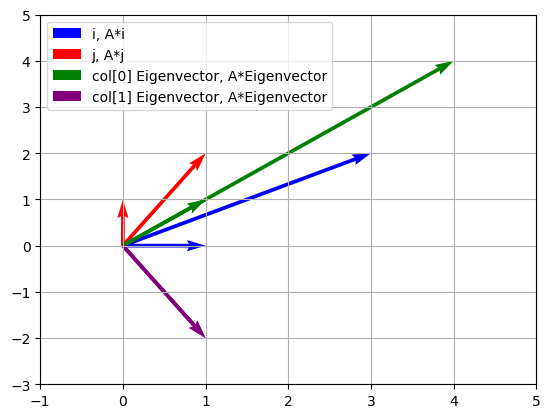

In [2]:
import matplotlib.pyplot as plt

# Original basis vectors
i = vector([1, 0])
j = vector([0, 1])

# Transformed basis vectors
i_transformed = A * i
j_transformed = A * j

# Plot
plt.figure()
plt.quiver([0, 0], [0, 0], [i[0], i_transformed[0]], [i[1], i_transformed[1]], 
           angles='xy', scale_units='xy', scale=1, color='blue', label='i, A*i')

plt.quiver([0, 0], [0, 0], [j[0], j_transformed[0]], [j[1], j_transformed[1]], 
           angles='xy', scale_units='xy', scale=1, color='red', label='j, A*j')


colors = ['green', 'purple']
for i, v in enumerate(eigenvectors.columns()):
    v_transformed = A * v
    plt.quiver([0, 0], [0, 0], [v[0], v_transformed[0]], [v[1], v_transformed[1]], 
               angles='xy', scale_units='xy', scale=1, color=colors[i], 
               label=f'col[{i}] Eigenvector, A*Eigenvector')

plt.xlim(-1, 5)
plt.ylim(-3, 5)
plt.grid()
plt.legend(loc='upper left')
plt.show()

The blue and red quivers in the plot represent the original basis vectors (`i` and `j`) and their transformed versions after being multiplied by matrix `A`.

Let's break it down:

* **Blue Quiver:** This represents the standard basis vector `i = (1, 0)`. The blue arrow starts at the origin (0, 0) and ends at the point (1, 0). The transformed version `A * i` is shown as a blue arrow starting at the origin and ending at the point where `i` is mapped to by the transformation.

* **Red Quiver:** This represents the standard basis vector `j = (0, 1)`. The red arrow starts at the origin (0, 0) and ends at the point (0, 1).  Similarly, `A * j` is shown as a red arrow starting at the origin and ending at the point where `j` is mapped to by the transformation.

**Why Show These?**

Visualizing the original basis vectors and their transformed versions helps us understand how the linear transformation (represented by matrix `A`) distorts the space. It gives us a clear picture of how the transformation stretches, rotates, or reflects the standard coordinate axes.

**Additional Notes:**

* The transformation defined by matrix `A` in your example seems to stretch the `i` vector and slightly rotate both `i` and `j`.
* The green (and purple, if you used the modified code) quivers represent the eigenvectors and their transformed versions, showcasing how they remain aligned with their original directions under the transformation.

**Diagonalization and Applications**

If a matrix has enough linearly independent eigenvectors, it can be **diagonalized**. This means we can express it in a simpler form:

```
A = P * D * P^(-1)
```

where:
* `P` is a matrix whose columns are the eigenvectors
* `D` is a diagonal matrix with the eigenvalues on the diagonal

Diagonalization is immensely useful in:

* **Solving systems of differential equations** 
* **Calculating matrix powers efficiently**
* **Simplifying calculations in quantum mechanics and other fields**